## YOLO_COCO

Using cache found in C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-1-30 Python-3.12.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


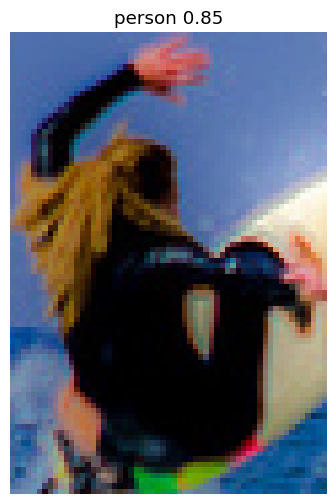

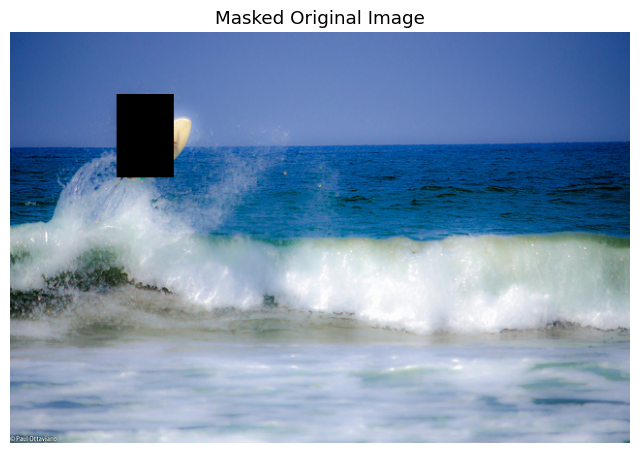

C:\Users\82107/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


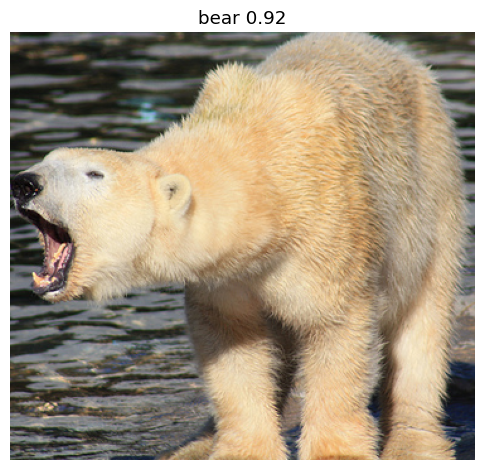

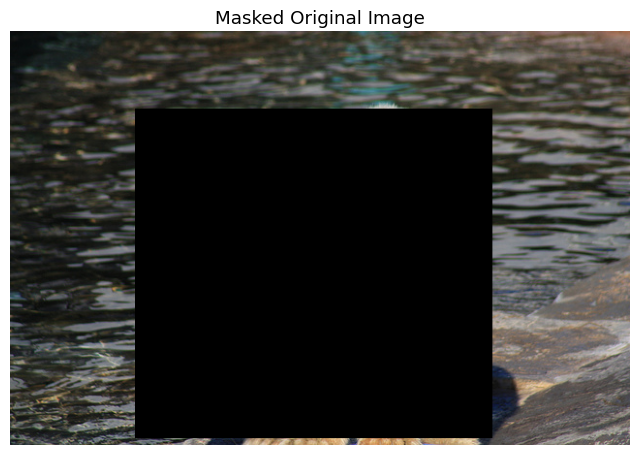

Object Image 1: Channels = 3, Height = 86, Width = 59
Object Image 2: Channels = 3, Height = 340, Width = 369


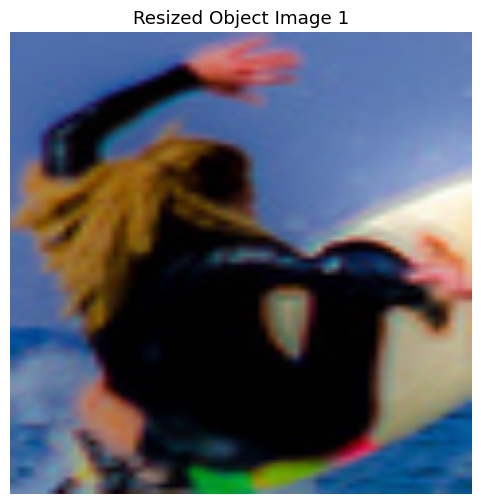

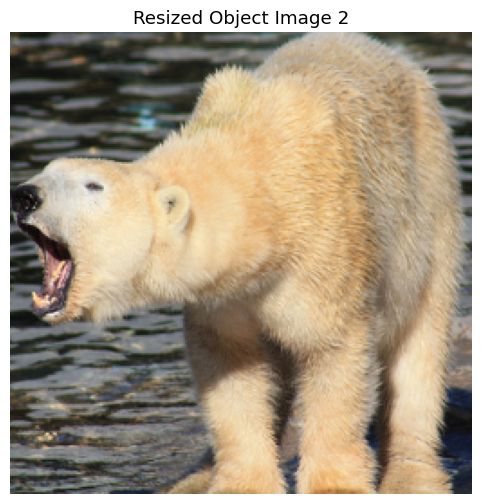

In [45]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

%matplotlib inline

# YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# COCO
image_dir = 'C:/Users/82107/unlabeled2017'
image_files = os.listdir(image_dir)

# 2개의 이미지 처리
num_images = min(2, len(image_files))

# 객체 이미지를 저장할 리스트
x = []

for idx in range(num_images):
    
    image_path = os.path.join(image_dir, image_files[idx])
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Object Detection
    results = model(image_rgb)

    # 객체 정보 추출
    detections = results.xyxy[0]

    # 원본 이미지 복사
    masked_image = image.copy()

    # 첫 번째 객체만 추출
    if len(detections) > 0:
        x1, y1, x2, y2, conf, cls = detections[0]  # 첫 번째 객체 정보
        x1, y1, x2, y2 = map(int, (x1, y1, x2, y2))
        label = f'{model.names[int(cls)]} {conf:.2f}'
        
        # 객체를 추출하여 리스트에 저장
        object_image = image_rgb[y1:y2, x1:x2]
        x.append(object_image)  # 객체 이미지 추가

        # 원본 이미지에서 객체 영역을 검은색으로 변경
        masked_image[y1:y2, x1:x2] = [0, 0, 0]

        # 추출된 객체 이미지 출력
        plt.figure(figsize=(6, 6))
        plt.imshow(object_image)
        plt.title(label)
        plt.axis('off')
        plt.show()

    # 마스크된 원본 이미지 출력
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.title('Masked Original Image')
    plt.axis('off')
    plt.show()

# 추출된 객체 이미지 정보
for i, obj_img in enumerate(x):
    channels, height, width = obj_img.shape[2], obj_img.shape[0], obj_img.shape[1]
    print(f'Object Image {i + 1}: Channels = {channels}, Height = {height}, Width = {width}')
    
# 리사이즈된 이미지를 저장할 리스트
resized_images = []

# 추출된 객체 이미지를 리사이즈하고 출력
for i, obj_img in enumerate(x):
    # 이미지 리사이즈
    resized_image = cv2.resize(obj_img, (256, 256), interpolation=cv2.INTER_LINEAR)
    resized_images.append(resized_image)  # 리사이즈된 이미지 추가

    # 리사이즈된 이미지 출력
    plt.figure(figsize=(6, 6))
    plt.imshow(resized_image)
    plt.title(f'Resized Object Image {i + 1}')
    plt.axis('off')
    plt.show()

## Convolutional Autoencoder

Epoch [1/300], Loss: 0.1621
Epoch [2/300], Loss: 0.1610
Epoch [3/300], Loss: 0.1601
Epoch [4/300], Loss: 0.1592
Epoch [5/300], Loss: 0.1583
Epoch [6/300], Loss: 0.1574
Epoch [7/300], Loss: 0.1565
Epoch [8/300], Loss: 0.1555
Epoch [9/300], Loss: 0.1542
Epoch [10/300], Loss: 0.1528
Epoch [11/300], Loss: 0.1511
Epoch [12/300], Loss: 0.1493
Epoch [13/300], Loss: 0.1477
Epoch [14/300], Loss: 0.1461
Epoch [15/300], Loss: 0.1444
Epoch [16/300], Loss: 0.1427
Epoch [17/300], Loss: 0.1411
Epoch [18/300], Loss: 0.1396
Epoch [19/300], Loss: 0.1379
Epoch [20/300], Loss: 0.1363
Epoch [21/300], Loss: 0.1347
Epoch [22/300], Loss: 0.1330
Epoch [23/300], Loss: 0.1314
Epoch [24/300], Loss: 0.1297
Epoch [25/300], Loss: 0.1279
Epoch [26/300], Loss: 0.1263
Epoch [27/300], Loss: 0.1245
Epoch [28/300], Loss: 0.1228
Epoch [29/300], Loss: 0.1211
Epoch [30/300], Loss: 0.1195
Epoch [31/300], Loss: 0.1178
Epoch [32/300], Loss: 0.1161
Epoch [33/300], Loss: 0.1145
Epoch [34/300], Loss: 0.1129
Epoch [35/300], Loss: 0

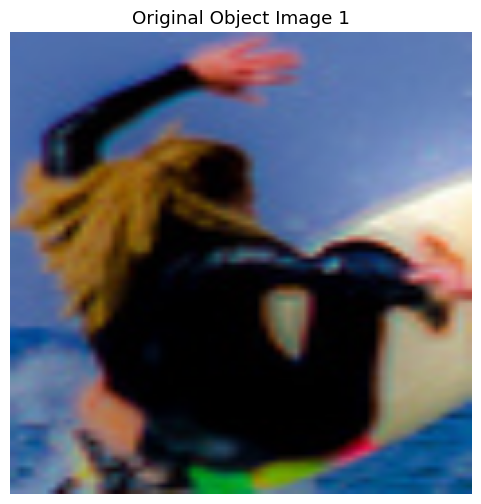

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08797607..1.0539604].


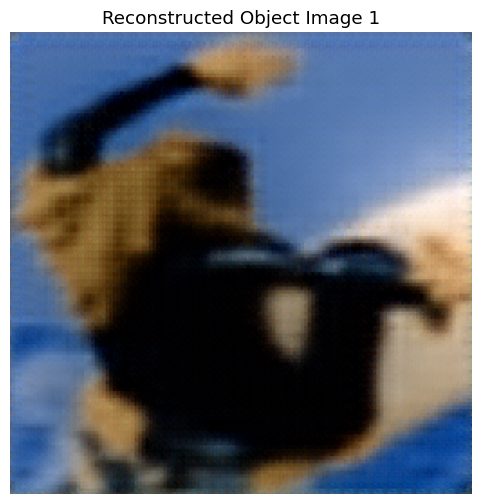

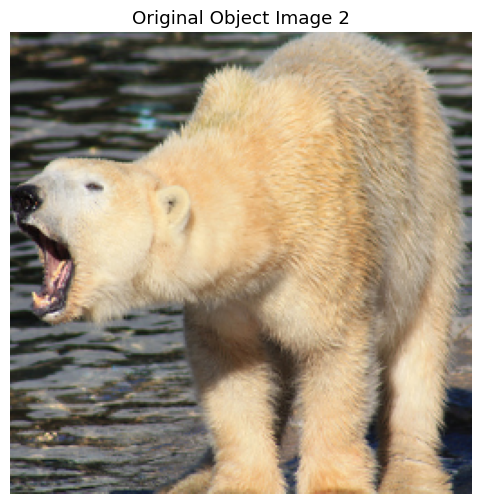

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.062452972..1.0125613].


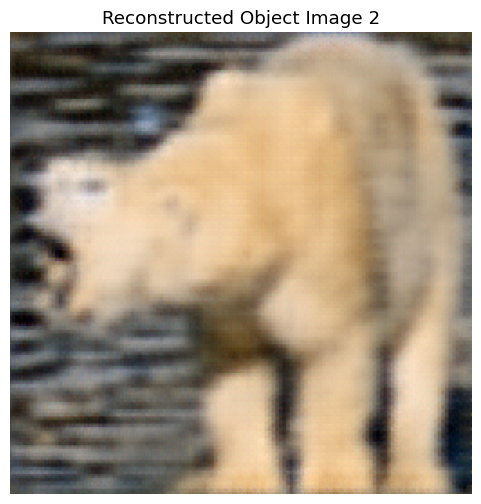

In [47]:
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim

# CAE
class ConvolutionalAutoencoder(nn.Module):
    def __init__(self):
        super(ConvolutionalAutoencoder, self).__init__()
        
        # encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 5, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 2, stride=2, padding=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# CAE model, train
cae_model = ConvolutionalAutoencoder()
cae_model.train()

# loss function, optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(cae_model.parameters(), lr=0.001)

# train data
train_images = [torch.tensor(img.transpose(2, 0, 1)).float() / 255.0 for img in resized_images]
train_images = torch.stack(train_images)

# model training
num_epochs = 300
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = cae_model(train_images)
    loss = criterion(outputs, train_images)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Original Image와 Reconstructed Image 출력
for i, obj_img in enumerate(train_images):
    plt.figure(figsize=(6, 6))
    plt.imshow(obj_img.permute(1, 2, 0).detach().numpy())
    plt.title(f'Original Object Image {i + 1}')
    plt.axis('off')
    plt.show()

    with torch.no_grad():
        reconstructed_image = cae_model(obj_img.unsqueeze(0))
    plt.figure(figsize=(6, 6))
    plt.imshow(reconstructed_image.squeeze(0).permute(1, 2, 0).detach().numpy())
    plt.title(f'Reconstructed Object Image {i + 1}')
    plt.axis('off')
    plt.show()